# Assignment 9: GBDT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install nltk

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.sparse import hstack
from scipy import sparse

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import math
from prettytable import PrettyTable
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud, STOPWORDS
from prettytable import PrettyTable
nltk.download('vader_lexicon')
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [ ]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

#Task 1

##Data Import Sentiment scores, response coding and split

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of preprocessed_data.csv',nrows = 35000)

In [5]:
df.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

Numerical Features:

- Price
- teacher_number_of_prviously_posted_projects
- neg
- neu
- pos
- compund


Categorical Features
- school_state
- teacher_prefix
- project_grade_category
- clean_categories
- clean_sub_categories

Text Features
 - essay

In [6]:
# 1. calculate sentiment scores for the essay feature 

sid = SentimentIntensityAnalyzer()
neg_val = []
neu_val = []
pos_val = []
compound_val = [] 

for es in tqdm(df['essay']):
  a = sid.polarity_scores(es)
  neg_val.append(a['neg'])
  neu_val.append(a['neu'])
  pos_val.append(a['pos'])
  compound_val.append(a['compound'])

100%|██████████| 35000/35000 [01:31<00:00, 381.46it/s]


In [7]:
df['neg'] = neg_val
df['neu'] = neu_val
df['pos'] = pos_val
df['compound'] = compound_val

In [8]:
df.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object')

In [9]:
#https://stackoverflow.com/questions/66122577/response-coding-for-categorical-data
#https://medium.com/@thewingedwolf.winterfell/response-coding-for-categorical-data-7bb8916c6dc1

def fit(df,x,y):
  dic = {}
  for st in df[x].unique():
    df_a = df[df[x] == st]
    l = len(df_a)
    
    #print((df_a[y] == 0).sum(),'This is 0')
    dic[st] = [((df_a[y] == 0)).sum()/l, (df_a[y] == 1).sum()/l]

  return dic
  

def transform(df,dic,x):
  values = []
  for i in tqdm(df[x]):
    if i in dic.keys():
      values.append(dic[i])
    else:
      values.append([0.5,0.5])
  return np.array(values)

In [10]:
#Response Coding school_state
dic = fit(df,'school_state','project_is_approved')
output = transform(df,dic,'school_state')

df['school_state_0'] = output[:,0]
df['school_state_1'] = output[:,1]
df.drop(['school_state'],axis = 1, inplace=True)
print('Response Coding school_state done' )
print('\n')

#Response Coding teacher_prefix
dic = fit(df,'teacher_prefix','project_is_approved')
output = transform(df,dic,'teacher_prefix')

df['teacher_prefix_0'] = output[:,0]
df['teacher_prefix_1'] = output[:,1]
df.drop(['teacher_prefix'],axis = 1, inplace=True)
print('Response Coding teacher_prefix done' )
print('\n')


#Response Coding  project_grade_categor
dic = fit(df,'project_grade_category','project_is_approved')
output = transform(df,dic,'project_grade_category')

df['project_grade_category_0'] = output[:,0]
df['project_grade_category_1'] = output[:,1]
df.drop(['project_grade_category'],axis = 1, inplace=True)

print('Response Coding roject_grade_category done' )
print('\n')

#Response Coding  clean_categories
dic = fit(df,'clean_categories','project_is_approved')
output = transform(df,dic,'clean_categories')

df['clean_categories_0'] = output[:,0]
df['clean_categories_1'] = output[:,1]
df.drop(['clean_categories'],axis = 1, inplace=True)
print('Response Coding  clean_categories done' )
print('\n')

#Response Coding clean_sub_categories
dic = fit(df,'clean_subcategories','project_is_approved')
output = transform(df,dic,'clean_subcategories')

df['clean_subcategories_0'] = output[:,0]
df['clean_subcategories_1'] = output[:,1]
df.drop(['clean_subcategories'],axis = 1, inplace=True)
print('Response Coding  clean_sub_categories done' )
print('\n')



100%|██████████| 35000/35000 [00:00<00:00, 1324413.49it/s]


Response Coding school_state done




100%|██████████| 35000/35000 [00:00<00:00, 1080369.74it/s]


Response Coding teacher_prefix done




100%|██████████| 35000/35000 [00:00<00:00, 1426287.49it/s]


Response Coding roject_grade_category done




100%|██████████| 35000/35000 [00:00<00:00, 1479546.87it/s]


Response Coding  clean_categories done




100%|██████████| 35000/35000 [00:00<00:00, 1675270.92it/s]

Response Coding  clean_sub_categories done




In [11]:
df.columns

Index(['teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'neg', 'neu', 'pos', 'compound', 'school_state_0',
       'school_state_1', 'teacher_prefix_0', 'teacher_prefix_1',
       'project_grade_category_0', 'project_grade_category_1',
       'clean_categories_0', 'clean_categories_1', 'clean_subcategories_0',
       'clean_subcategories_1'],
      dtype='object')

In [12]:
y = df['project_is_approved'].values
X = df.drop('project_is_approved',axis = 1)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.3,random_state = 30)

print('Train Data:', X_train.shape,y_train.shape)
print('Test Data:', X_test.shape,y_test.shape)


Train Data: (24500, 17) (24500,)
Test Data: (10500, 17) (10500,)


In [14]:
X_train.columns

Index(['teacher_number_of_previously_posted_projects', 'essay', 'price', 'neg',
       'neu', 'pos', 'compound', 'school_state_0', 'school_state_1',
       'teacher_prefix_0', 'teacher_prefix_1', 'project_grade_category_0',
       'project_grade_category_1', 'clean_categories_0', 'clean_categories_1',
       'clean_subcategories_0', 'clean_subcategories_1'],
      dtype='object')

##Encoding Text Features

In [15]:
# 3. perform tfidf vectorization of text data.

vect = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features = 5000)

X_train_essay_tfidf = vect.fit_transform(X_train['essay'])
X_test_essay_tfidf = vect.transform(X_test['essay'])

In [16]:
#https://medium.com/analytics-vidhya/featurization-of-text-data-bow-tf-idf-avgw2v-tfidf-weighted-w2v-7a6c62e8b097
# 4. perform tfidf w2v vectorization of text data.

#Using the glove vectors
with open('/content/drive/MyDrive/Dataset/Copy of glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#Tfidf 
vect = TfidfVectorizer(min_df = 10,ngram_range=(1,4),max_features = 5000)
tfidf = vect.fit(X_train['essay'])


dictionary = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
print(dictionary)
tfidf_words = list(tfidf.get_feature_names())
print(tfidf_words)

{'000': 5.935985216988233, '10': 4.546853974533143, '100': 3.818224811006261, '100 free': 5.496997416841426, '100 percent': 6.102522906080926, '100 students': 4.903933694838463, '100 students receive': 5.754611078550319, '100 students receive free': 5.7641349600615746, '11': 5.6815191945449826, '12': 4.80019392507837, '12th': 6.116036625247649, '14': 6.157709321648217, '15': 5.068598292104248, '16': 6.164826789417081, '17': 6.17921552686918, '18': 5.569134945007849, '1st': 4.839268663485023, '1st grade': 5.461022314383148, '1st graders': 6.2466568076647135, '20': 4.478427835846853, '2016': 5.240001155093089, '2016 2017': 5.870027249196436, '2016 2017 school': 6.164826789417081, '2016 2017 school year': 6.164826789417081, '2017': 5.773750418761017, '2017 school': 6.157709321648217, '2017 school year': 6.157709321648217, '21': 5.8915334544174, '21st': 4.088067412957185, '21st century': 4.097060279317748, '21st century learners': 5.838611052963057, '21st century skills': 5.593040465861403

In [ ]:
#For train we will use only train essay and vectors
train_avg_tfidf =  []

for sent in tqdm(X_train['essay']):
  vect = np.zeros(300)
  tfidf_weight = 0
  for word in sent.split():
    if (word in glove_words) and (word in tfidf_words):
      #Get vector of word from glove
      vec = model[word]
      #tfidf is idf* tf
      tfidf_val = dictionary[word]* (sent.count(word)/len(sent.split()))
      #Appending the avg word to vec
      vect += (vec*tfidf_val)
      tfidf_weight += tfidf_val
  if tfidf_weight != 0:
    train_avg_tfidf.append(vect/tfidf_weight)



# tfidf weighted vector fo test using only the test essay 
test_avg_tfidf =  []

for sent in tqdm(X_test['essay']):
  vect = np.zeros(300)
  tfidf_weight = 0
  for word in sent.split():
    if (word in glove_words) and (word in tfidf_words):
      #Get vector of word from glove
      vec = model[word]
      #tfidf is idf* tf
      tfidf_val = dictionary[word]* (sent.count(word)/len(sent.split()))
      #Appending the avg word to vec
      vect += (vec*tfidf_val)
      tfidf_weight += tfidf_val
  if tfidf_weight != 0:
    test_avg_tfidf.append(vect/tfidf_weight)

 53%|█████▎    | 5601/10500 [01:12<01:00, 81.07it/s]

In [ ]:
print(len(train_avg_tfidf))
print(len(train_avg_tfidf[0]))
print(len(test_avg_tfidf))
print(len(test_avg_tfidf[0]))

## Encoding Numerical Features

In [ ]:
def num_encode(train,test):
  norm = Normalizer()
  train = norm.fit_transform(train.values.reshape(-1,1))
  test = norm.transform(test.values.reshape(-1,1))
  return train, test

X_train_price, X_test_price = num_encode(X_train['price'],X_test['price'])
X_train_tnp, X_test_tnp = num_encode(X_train['teacher_number_of_previously_posted_projects'],X_test['teacher_number_of_previously_posted_projects'])
X_train_neg, X_test_neg = num_encode(X_train['neg'],X_test['neg'])
X_train_neu, X_test_neu = num_encode(X_train['neu'],X_test['neu'])
X_train_pos, X_test_pos = num_encode(X_train['pos'],X_test['pos'])
X_train_compound, X_test_compound = num_encode(X_train['compound'],X_test['compound'])




##Dropping extra Features

In [ ]:
X_train.columns

In [ ]:
X_train.drop(['essay'],axis = 1, inplace=True)
X_train.drop(['price'],axis = 1, inplace=True)
X_train.drop(['teacher_number_of_previously_posted_projects'],axis = 1, inplace=True)
X_train.drop(['neg'],axis = 1, inplace=True)
X_train.drop(['neu'],axis = 1, inplace=True)
X_train.drop(['pos'],axis = 1, inplace=True)
X_train.drop(['compound'],axis = 1, inplace=True)

X_train.columns



In [ ]:
X_test.columns

In [ ]:
X_test.drop(['essay'],axis = 1, inplace=True)
X_test.drop(['price'],axis = 1, inplace=True)
X_test.drop(['teacher_number_of_previously_posted_projects'],axis = 1, inplace=True)
X_test.drop(['neg'],axis = 1, inplace=True)
X_test.drop(['neu'],axis = 1, inplace=True)
X_test.drop(['pos'],axis = 1, inplace=True)
X_test.drop(['compound'],axis = 1, inplace=True)

X_test.columns

#Set 1

In [ ]:
#Data

X_train = hstack((X_train,X_train_essay_tfidf,X_train_price,X_train_tnp,X_train_neg,X_train_neu,X_train_pos,X_train_compound)).tocsr()
X_test = hstack((X_test,X_test_essay_tfidf,X_test_price,X_test_tnp,X_test_neg,X_test_neu,X_test_pos,X_test_compound)).tocsr()

print('Train',X_train.shape,'y:',y_train.shape)
print('Test',X_test.shape,'y:',y_test.shape)

Train (24500, 5016) y: (24500,)
Test (10500, 5016) y: (10500,)


### Best Hyper Param and Train Test AUC

In [ ]:
#Finding Best Hyper Parametr

model = GradientBoostingClassifier()
param = {"max_depth": [1, 2,3,5], "min_samples_split" : [5, 10, 15, 20]}
grid = GridSearchCV(model,param, scoring = 'roc_auc', cv = 5,return_train_score=True,verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 1/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.696, test=0.666) total time=  35.6s
[CV 2/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 2/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.697, test=0.662) total time=  35.4s
[CV 3/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 3/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.694, test=0.673) total time=  35.4s
[CV 4/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 4/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.695, test=0.669) total time=  35.5s
[CV 5/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 5/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.697, test=0.648) total time=  35.4s
[CV 1/5; 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5],
                         'min_samples_split': [5, 10, 15, 20]},
             return_train_score=True, scoring='roc_auc', verbose=10)

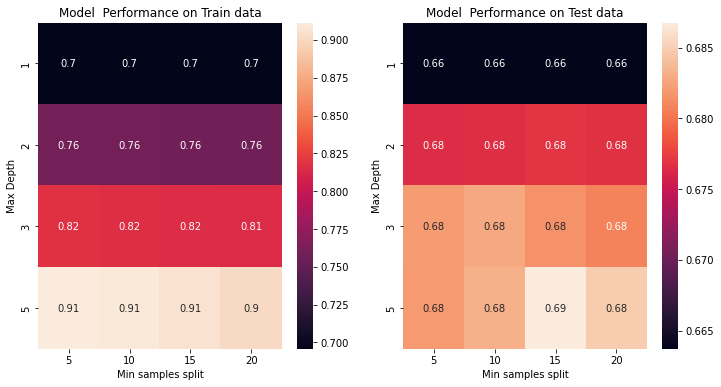

In [ ]:
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#Plotting the results 

train_auc = grid.cv_results_['mean_train_score'].reshape(4,4)
test_auc = grid.cv_results_['mean_test_score'].reshape(4,4)
columns=['5','10','15','20']
index=['1','2','3','5']
train_auc_df = pd.DataFrame(train_auc, index=index, columns=columns)
test_auc_df = pd.DataFrame(test_auc, index=index, columns=columns)


fig, ax  = plt.subplots(1,2,figsize = (12,6))
sns.heatmap(train_auc_df,ax = ax[0], annot=True)
ax[0].set_title("Model  Performance on Train data")
ax[0].set_xlabel("Min samples split")
ax[0].set_ylabel("Max Depth")


sns.heatmap(test_auc_df,ax = ax[1] ,annot=True)
ax[1].set_title("Model  Performance on Test data")
ax[1].set_xlabel("Min samples split")
ax[1].set_ylabel("Max Depth")
plt.show()

In [ ]:
print("The best params",grid.best_params_)
print("The best score:",grid.best_score_)

The best params {'max_depth': 5, 'min_samples_split': 15}
The best score: 0.686766501159236


Train AUC  0.8891342341348817
Test AUC  0.7078514870519427


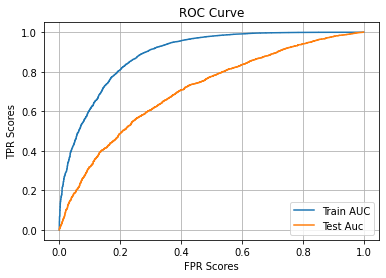

In [ ]:
#ROC Curve fr train and test
model = GradientBoostingClassifier(max_depth = grid.best_params_['max_depth'], min_samples_split = grid.best_params_['min_samples_split'])
model.fit(X_train,y_train)

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_prob)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_prob)

plt.plot(train_fpr,train_tpr,label = 'Train AUC')
plt.plot(test_fpr,test_tpr,label = 'Test Auc')
plt.title('ROC Curve')
plt.xlabel('FPR Scores')
plt.ylabel('TPR Scores')
plt.legend()
plt.grid()

print('Train AUC ',auc(train_fpr,train_tpr))
print('Test AUC ',auc(test_fpr,test_tpr))

###Confusion Matrix

In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

# Predicting output with threshold from least fpr
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [ ]:
#Plotting Confusion Matrix
best_t = find_best_threshold(train_thresholds, train_fpr, train_tpr)

print("Train confusion matrix")
train_cm_df = confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t))
print(train_cm_df)

print("Test confusion matrix")
test_cm_df = confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t))
print(test_cm_df)

the maximum value of tpr*(1-fpr) 0.6547111655963397 for threshold 0.822
Train confusion matrix
[[ 2894   866]
 [ 3098 17642]]
Test confusion matrix
[[ 795  816]
 [1946 6943]]


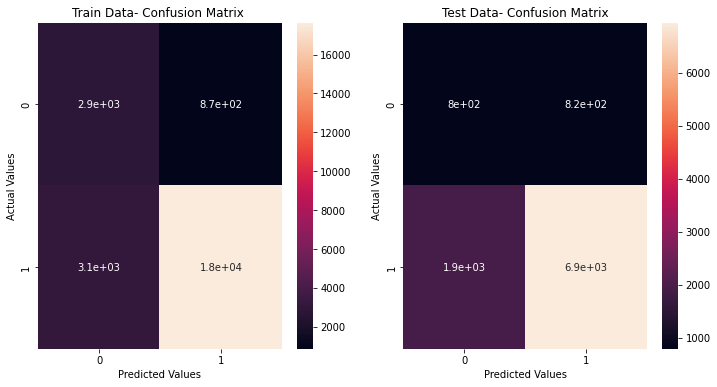

In [ ]:
fig, ax  = plt.subplots(1,2,figsize = (12,6))

sns.heatmap(train_cm_df,ax= ax[0],annot=True)
ax[0].set_title('Train Data- Confusion Matrix ')
ax[0].set_ylabel('Actual Values')
ax[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df,ax= ax[1],annot=True)
ax[1].set_title('Test Data- Confusion Matrix')
ax[1].set_ylabel('Actual Values')
ax[1].set_xlabel('Predicted Values')
plt.show()

#Set 2

In [ ]:
#Data

X_train = hstack((X_train,X_train_essay_tfidf,X_train_price,X_train_tnp,X_train_neg,X_train_neu,X_train_pos,X_train_compound)).tocsr()
X_test = hstack((X_test,X_test_essay_tfidf,X_test_price,X_test_tnp,X_test_neg,X_test_neu,X_test_pos,X_test_compound)).tocsr()

print('Train',X_train.shape,'y:',y_train.shape)
print('Test',X_test.shape,'y:',y_test.shape)

Train (24500, 5016) y: (24500,)
Test (10500, 5016) y: (10500,)


### Best Hyper Param and Train Test AUC

In [ ]:
#Finding Best Hyper Parametr

model = GradientBoostingClassifier()
param = {"max_depth": [1, 2,3,5], "min_samples_split" : [5, 10, 15, 20]}
grid = GridSearchCV(model,param, scoring = 'roc_auc', cv = 5,return_train_score=True,verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 1/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.696, test=0.666) total time=  36.9s
[CV 2/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 2/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.697, test=0.662) total time=  37.4s
[CV 3/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 3/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.694, test=0.673) total time=  36.6s
[CV 4/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 4/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.695, test=0.669) total time=  36.9s
[CV 5/5; 1/16] START max_depth=1, min_samples_split=5...........................
[CV 5/5; 1/16] END max_depth=1, min_samples_split=5;, score=(train=0.697, test=0.648) total time=  37.0s
[CV 1/5; 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5],
                         'min_samples_split': [5, 10, 15, 20]},
             return_train_score=True, scoring='roc_auc', verbose=10)

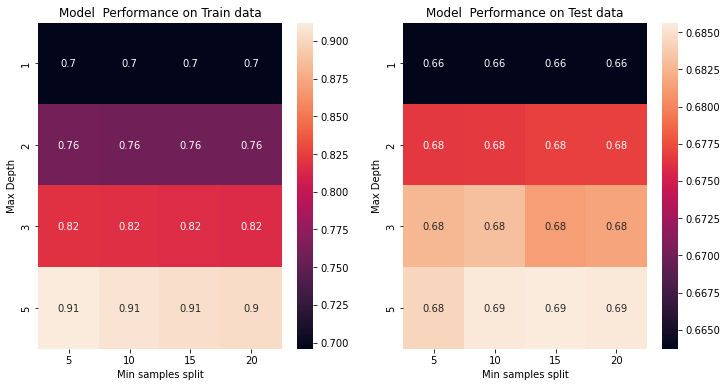

In [ ]:
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#Plotting the results 

train_auc = grid.cv_results_['mean_train_score'].reshape(4,4)
test_auc = grid.cv_results_['mean_test_score'].reshape(4,4)
columns=['5','10','15','20']
index=['1','2','3','5']
train_auc_df = pd.DataFrame(train_auc, index=index, columns=columns)
test_auc_df = pd.DataFrame(test_auc, index=index, columns=columns)


fig, ax  = plt.subplots(1,2,figsize = (12,6))
sns.heatmap(train_auc_df,ax = ax[0], annot=True)
ax[0].set_title("Model  Performance on Train data")
ax[0].set_xlabel("Min samples split")
ax[0].set_ylabel("Max Depth")


sns.heatmap(test_auc_df,ax = ax[1] ,annot=True)
ax[1].set_title("Model  Performance on Test data")
ax[1].set_xlabel("Min samples split")
ax[1].set_ylabel("Max Depth")
plt.show()

In [ ]:
print("The best params",grid.best_params_)
print("The best score:",grid.best_score_)

The best params {'max_depth': 5, 'min_samples_split': 15}
The best score: 0.6856388108085927


Train AUC  0.8907075378546955
Test AUC  0.7099926963203462


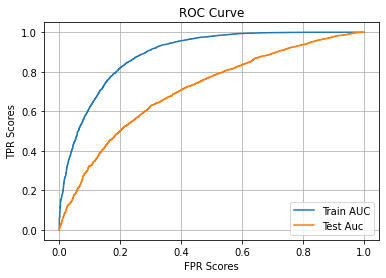

In [ ]:
#ROC Curve fr train and test
model = GradientBoostingClassifier(max_depth = grid.best_params_['max_depth'], min_samples_split = grid.best_params_['min_samples_split'])
model.fit(X_train,y_train)

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_prob)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_prob)

plt.plot(train_fpr,train_tpr,label = 'Train AUC')
plt.plot(test_fpr,test_tpr,label = 'Test Auc')
plt.title('ROC Curve')
plt.xlabel('FPR Scores')
plt.ylabel('TPR Scores')
plt.legend()
plt.grid()

print('Train AUC ',auc(train_fpr,train_tpr))
print('Test AUC ',auc(test_fpr,test_tpr))

###Confusion Matrix

In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

# Predicting output with threshold from least fpr
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [ ]:
#Plotting Confusion Matrix
best_t = find_best_threshold(train_thresholds, train_fpr, train_tpr)

print("Train confusion matrix")
train_cm_df = confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t))
print(train_cm_df)

print("Test confusion matrix")
test_cm_df = confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t))
print(test_cm_df)

the maximum value of tpr*(1-fpr) 0.658817194649049 for threshold 0.826
Train confusion matrix
[[ 2942   818]
 [ 3277 17463]]
Test confusion matrix
[[ 819  792]
 [2037 6852]]


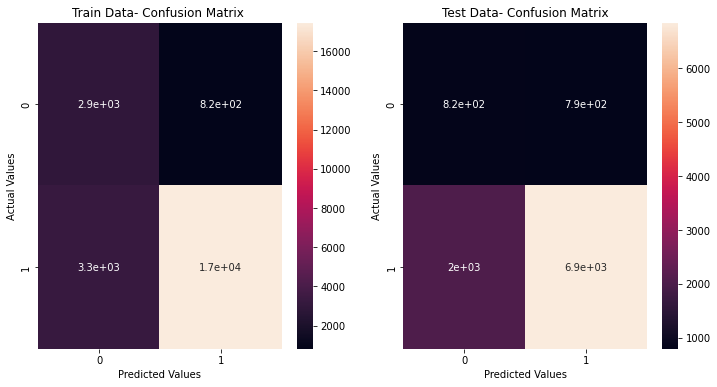

In [ ]:
fig, ax  = plt.subplots(1,2,figsize = (12,6))

sns.heatmap(train_cm_df,ax= ax[0],annot=True)
ax[0].set_title('Train Data- Confusion Matrix ')
ax[0].set_ylabel('Actual Values')
ax[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df,ax= ax[1],annot=True)
ax[1].set_title('Test Data- Confusion Matrix')
ax[1].set_ylabel('Actual Values')
ax[1].set_xlabel('Predicted Values')
plt.show()

#Results

In [ ]:
myTable = PrettyTable(["Model", "Vectorizer", "max_depth","min_samples_split", "Train AUC","Test AUC"])
myTable.add_row(["GBDT", "TFIDF", "3","100","60 %", "55 %"])
myTable.add_row(["GBDT", "TFIDF W2V", "30","100", "90 %","54 %"])
print(myTable)

+-------+------------+-----------+-------------------+-----------+----------+
| Model | Vectorizer | max_depth | min_samples_split | Train AUC | Test AUC |
+-------+------------+-----------+-------------------+-----------+----------+
|  GBDT |   TFIDF    |     3     |        100        |    60 %   |   55 %   |
|   DT  | TFIDF W2V  |     30    |        100        |    90 %   |   54 %   |
+-------+------------+-----------+-------------------+-----------+----------+
